# Занятие 10

Ноутбук в колаб: https://colab.research.google.com/drive/1teM4stazUlYDRGDfi5N3SRRmSNXU42DT?usp=sharing

In [4]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

-------
<h1 align="center"> Работа с признаками </h1> 

# Предобработка данных
скачайте данные с помощью pd.read_csv по ссылке https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data и уберите заголовок

In [5]:
# Считываем данные
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')

# Назначаем имена колонок
columns = ('age workclass fnlwgt education educ-num marital-status occupation relationship '
           'race sex capital-gain capital-loss  hours-per-week native-country salary')

df.columns = columns.split() #этот метод разделит датасет по колонкам как в массиве columns

In [6]:
df.head(10)

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### Перекодировка категориальных признаков

Алгоритмы не могут работать с текстовыми данными без предварительной конвертации в числовой формат.

Работа с категориальными признаками может быть устроена по разному.

В этой задаче предлагается заменить все уникальные значения таких признаков некоторым числовым значением.

In [7]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data.head() 

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [8]:
# отображаем его
encoders

{'education': LabelEncoder(),
 'marital-status': LabelEncoder(),
 'native-country': LabelEncoder(),
 'occupation': LabelEncoder(),
 'race': LabelEncoder(),
 'relationship': LabelEncoder(),
 'salary': LabelEncoder(),
 'sex': LabelEncoder(),
 'workclass': LabelEncoder()}

Посмотрим, во что переведены категориальные признаки

In [9]:
df.groupby('race').count()[['age']]

,age
race,
Amer-Indian-Eskimo,311
Asian-Pac-Islander,1039
Black,3124
Other,271
White,27815


In [10]:
encoded_data.groupby('race').count()[['age']]

,age
race,
0,311
1,1039
2,3124
3,271
4,27815


In [11]:
encoders['race'].transform([' Black'])

array([2])

In [12]:
df.groupby('workclass').count()[['age']]

,age
workclass,
?,1836
Federal-gov,960
Local-gov,2093
Never-worked,7
Private,22696
Self-emp-inc,1116
Self-emp-not-inc,2541
State-gov,1297
Without-pay,14


In [13]:
encoded_data.groupby('workclass').count()[['age']]

,age
workclass,
0,1836
1,960
2,2093
3,7
4,22696
5,1116
6,2541
7,1297
8,14


### Гистограммы значений
постройте графики гистограмм зависимости различных признаков для того, чтоб оценить корректность данных

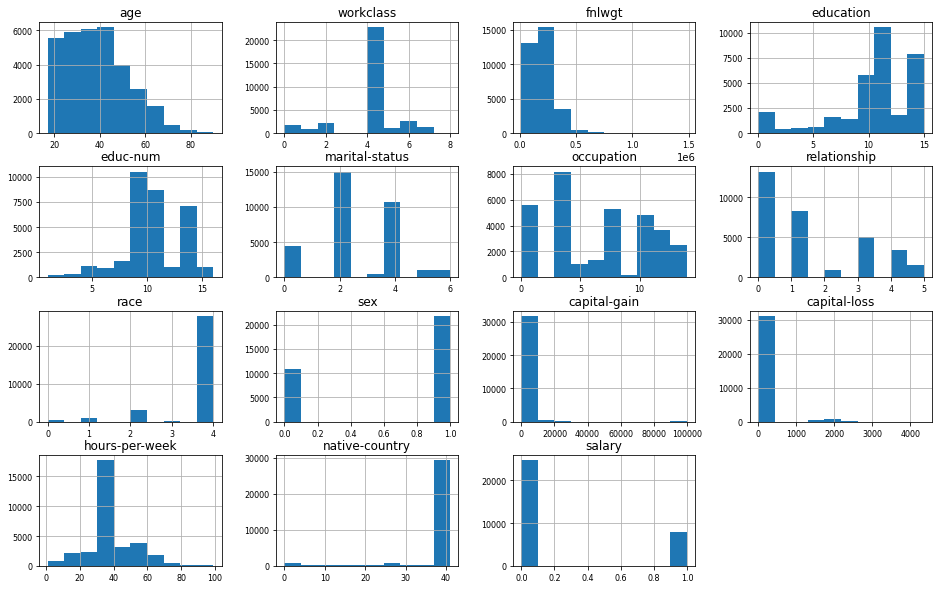

In [14]:
encoded_data.hist(figsize = (16,10), xlabelsize = 8, ylabelsize = 8)
plt.show()

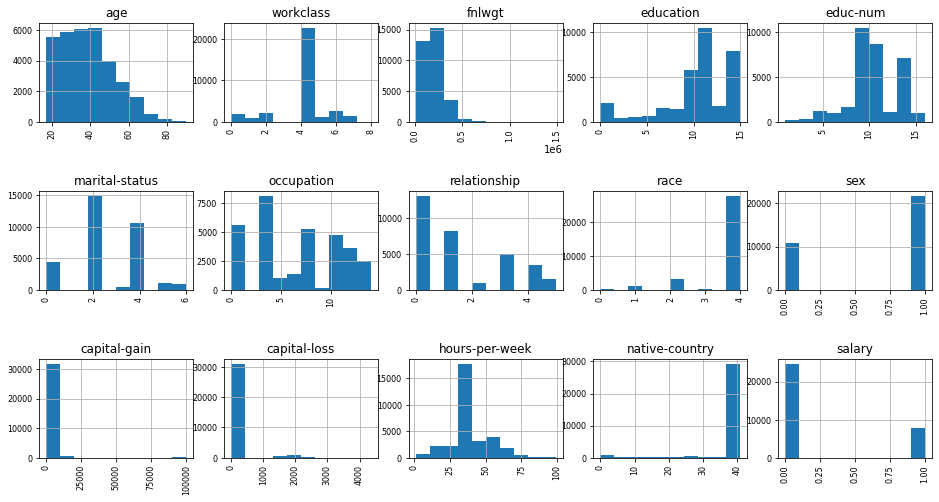

In [15]:
fig = plt.figure(figsize=(16,8))
cols = 5

rows = np.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax, xlabelsize = 8, ylabelsize = 8)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

### Матрица корреляций

По тепловой карте можно посмотреть на зависимости между признаками, а также на зависимости между целевой переменной и признаками. 

Положительная зависимость означает прямую зависимость (чем больше одно, тем меньше другое), отрицательная означает обратное.

Значение близкое к нулю не обязательно означает отсутствие зависимости! Это лишь значит, что между признаками нет прямой (линейной) зависимости

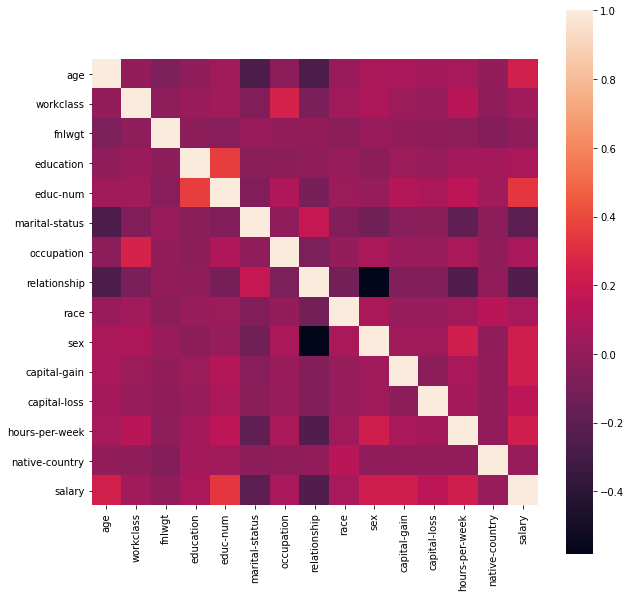

In [16]:
# тоже крутой модуль, для различной визуализации данных
import seaborn as sns

plt.subplots(figsize=(10,10))
encoded_data, encoders = number_encode_features(df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

В данном датасете пропущенные значения обозначены как " ?".  Удалим из выборки все объекты с пропусками.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32560 non-null  int64 
 1   workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   education       32560 non-null  object
 4   educ-num        32560 non-null  int64 
 5   marital-status  32560 non-null  object
 6   occupation      32560 non-null  object
 7   relationship    32560 non-null  object
 8   race            32560 non-null  object
 9   sex             32560 non-null  object
 10  capital-gain    32560 non-null  int64 
 11  capital-loss    32560 non-null  int64 
 12  hours-per-week  32560 non-null  int64 
 13  native-country  32560 non-null  object
 14  salary          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [18]:
# удалим все объекты, в которых содержатся пропуски
df = df.dropna()
df.count()

age               32560
workclass         32560
fnlwgt            32560
education         32560
educ-num          32560
marital-status    32560
occupation        32560
relationship      32560
race              32560
sex               32560
capital-gain      32560
capital-loss      32560
hours-per-week    32560
native-country    32560
salary            32560
dtype: int64

In [19]:
df.groupby('salary').count()[['age']]

,age
salary,
<=50K,24719
>50K,7841


Будем предсказывать salary (> или < 50к в год - бинарная классификация)

In [20]:
# создадим копию
df_prc = df.copy()
df_prc['salary'] = df['salary'].apply((lambda x: x==' >50K')) # Будем предсказывать 1(True), если зарплата больше 50K, 0(False) иначе
df_prc.head()

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,False
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,False
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,False
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,False
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,False


Для того, чтоб можно было выбрать нужные колонки

In [21]:
# числовые признаки
df._get_numeric_data().columns

Index(['age', 'fnlwgt', 'educ-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [22]:
# Найдём категориальные признаки
Categorical_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
Categorical_cols

['sex',
 'workclass',
 'education',
 'salary',
 'native-country',
 'marital-status',
 'relationship',
 'occupation',
 'race']

In [23]:
X = np.array(df_prc[df._get_numeric_data().columns])
# y = np.array(df_prc['salary'], dtype='int')
y = encoders['salary'].transform(df['salary']) # применяем наши кодировщики к категориальным фичам

In [24]:
X

array([[    50,  83311,     13,      0,      0,     13],
       [    38, 215646,      9,      0,      0,     40],
       [    53, 234721,      7,      0,      0,     40],
       ...,
       [    58, 151910,      9,      0,      0,     40],
       [    22, 201490,      9,      0,      0,     20],
       [    52, 287927,      9,  15024,      0,     40]])

In [25]:
y

array([0, 0, 0, ..., 0, 0, 1])

------------------------------
# Масштабирование признаков

В качестве классификатора используем kNN, признаки: число соседей (*n_neighbors*) и метрика (*metrics*).

Подберём оптимальные значения указанных гиперпараметров

In [26]:
# Будем использовать модель k ближайших соседей, которую проходили на 5 занятии
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

Для получения более точной оценки нашего алгоритма будем использовать [кросс-валидацию](https://neerc.ifmo.ru/wiki/index.php?title=%D0%9A%D1%80%D0%BE%D1%81%D1%81-%D0%B2%D0%B0%D0%BB%D0%B8%D0%B4%D0%B0%D1%86%D0%B8%D1%8F)

Результаты тестов на каждом проходе (fold) усредним

![alt text](http://scott.fortmann-roe.com/docs/docs/MeasuringError/crossvalidation.png)

### Подбор параметра n_neighbors для KNeighborsClassifier

У алгоритма knn есть один гиперпараметр (то значение, которое мы выставляем руками) -- число соседей на основе которых алгоритм принимает решение.

Как обсуждалось на лекции, подбор подобных параметров можно осуществлять на основе специальной отложенной (тестовой) выборки, а можно с помощью кросс-валидации. (Вспомните, какие плюсы и минусы имеет каждый из подходов)

В данной задаче мы будем использовать кросс-валидацию на 5 фолдах.

In [27]:
np.array(np.linspace(1, 100, 10), dtype='int')

array([  1,  12,  23,  34,  45,  56,  67,  78,  89, 100])

In [28]:
# В sklearn есть специальный модуль для работы с кросс-валидацией
from sklearn.model_selection import GridSearchCV

# Зададим сетку - среди каких значений выбирать наилучший параметр.
knn_grid = {'n_neighbors': np.array(np.linspace(25, 35, 10), dtype='int')} #,
            # 'metric': ['EuclideanDistance', 'ManhattanDistance']} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)

# Создаем объект кросс-валидации
gs = GridSearchCV(knn, knn_grid, cv=5)

# Обучаем его
gs.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([25, 26, 27, 28, 29, 30, 31, 32, 33, 35])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [29]:
# Функция отрисовки графиков

def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

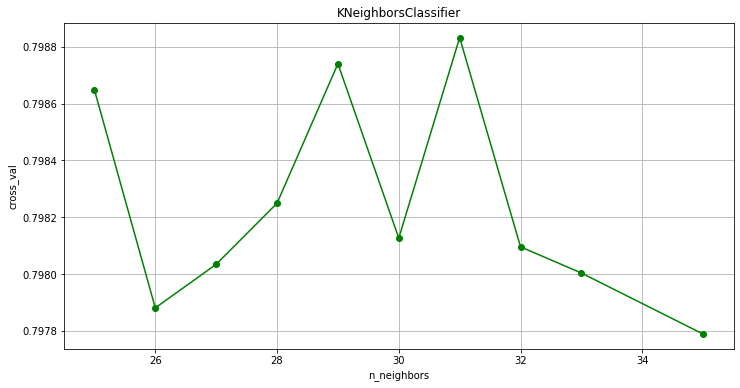

In [30]:
# Строим график зависимости качества от числа соседей
# замечание: результаты обучения хранятся в атрибуте cv_results_ объекта gs

grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [31]:
# по аналогии поменяем количество точек для проверки разных значений параметра k - 11 точек в диапазоне от 15 до 35 (равные промежутки, int)
knn_grid = {'n_neighbors': np.array(np.linspace(15, 35, 11), dtype='int')}
gs = GridSearchCV(knn, knn_grid, cv=10)
gs.fit(X, y)

# best_params_ содержит в себе лучшие подобранные параметры, best_score_ лучшее качество
gs.best_params_, gs.best_score_

({'n_neighbors': 29}, 0.7993243243243242)

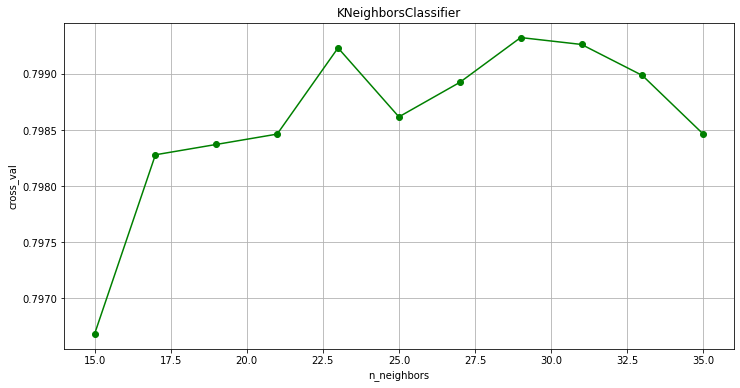

In [32]:
# отобразим результат по аналогии
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

Масштабирование признаков можно выполнить, например, одним из следующих способов способами:
 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))
 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — минимальный интервал значений признака

In [33]:
(X - X.mean(axis=0))/X.std(axis=0)

array([[ 0.83709708, -1.0087417 ,  1.13477863, -0.14591373, -0.21666301,
        -2.22212013],
       [-0.04264043,  0.24504633, -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [ 1.05703146,  0.42576955, -1.19742926, -0.14591373, -0.21666301,
        -0.03542999],
       ...,
       [ 1.42358875, -0.3588108 , -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [-1.21562378,  0.11092744, -0.42002663, -0.14591373, -0.21666301,
        -1.65520046],
       [ 0.98372   ,  0.92986178, -0.42002663,  1.88840054, -0.21666301,
        -0.03542999]])

In [34]:
from sklearn.preprocessing import scale
X_scaled = scale(np.array(X, dtype='float'), with_std=True, with_mean=True)

In [35]:
X_scaled

array([[ 0.83709708, -1.0087417 ,  1.13477863, -0.14591373, -0.21666301,
        -2.22212013],
       [-0.04264043,  0.24504633, -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [ 1.05703146,  0.42576955, -1.19742926, -0.14591373, -0.21666301,
        -0.03542999],
       ...,
       [ 1.42358875, -0.3588108 , -0.42002663, -0.14591373, -0.21666301,
        -0.03542999],
       [-1.21562378,  0.11092744, -0.42002663, -0.14591373, -0.21666301,
        -1.65520046],
       [ 0.98372   ,  0.92986178, -0.42002663,  1.88840054, -0.21666301,
        -0.03542999]])

### Подборка параметра n_neighbors для KNeighborsClassifier при нормированных признаках

зачем нормализовывать?
см. [пункт нормализация](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D0%B1%D0%BB%D0%B8%D0%B6%D0%B0%D0%B9%D1%88%D0%B8%D1%85_%D1%81%D0%BE%D1%81%D0%B5%D0%B4%D0%B5%D0%B9)

{'n_neighbors': 67} 0.8221437346437346


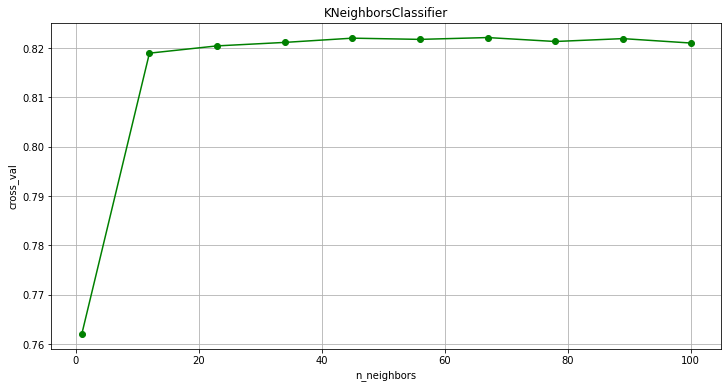

In [36]:
# обучение идентично предыдущим, но в этот раз нормированные значения
grid = {'n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int')}
gs = GridSearchCV(knn, grid, cv=10)
gs.fit(X_scaled, y)

print(gs.best_params_, gs.best_score_)

grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

{'n_neighbors': 59} 0.822972972972973


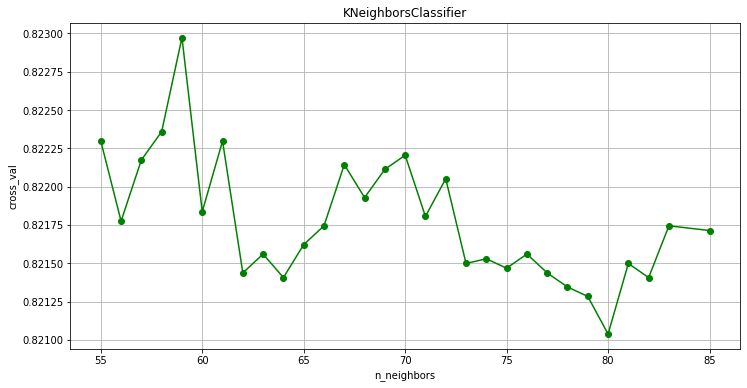

In [37]:
# все тот же код, перебираем другие значения
grid = {'n_neighbors': np.array(np.linspace(55, 85, 30), dtype='int')}
gs = GridSearchCV(knn, grid, cv=10, n_jobs=5)
gs.fit(X_scaled, y)
print(gs.best_params_, gs.best_score_)
grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

<h1 align="center"> Метрики </h1> 

# Метрики для задачи классификации

[ВАЖНО](https://habr.com/ru/company/ods/blog/328372/) прочесть

### Accuracy

Не подходит для несбалансированных классов. 

Пускай имеем задачу кредитного скоринга: 100 людей, 10 из них ненадежные заемщики и выдача кредита им принесет убытки. Accuracy будет 90/100 = 90%

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_tain, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Используем 2 классификаторва 
- умный kNN
- глупый -- DummyClassifier (самый популярный класс)

In [39]:
from sklearn import dummy

# импортируем и создаем knn классификатор по аналогии
knn = KNeighborsClassifier(n_neighbors=59) 
# тренируем для knn и для dummy
clf_knn = knn.fit(X_train, y_tain)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_tain)

In [40]:
# получаем от них предикты
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

In [41]:
# ответы knn
y_knn

array([0, 0, 0, ..., 0, 1, 0])

In [42]:
# реальные ответы
y_test

array([0, 0, 1, ..., 0, 1, 0])

### Accuracy

$$Accuracy = \frac{\sum_{x_i, y_i \in (X, Y)} I(y(x_i) = y_i)}{|(X, Y)|} = \frac{num~right~classified~obj}{num~all~obj}$$

In [43]:
from sklearn import metrics

print ('knn =', metrics.accuracy_score(y_test, y_knn), 'mp =', metrics.accuracy_score(y_test, y_mp))

knn = 0.7891112145183806 mp = 0.7553280595625872


### Conf-matrix

[[8099   17]
 [2249  380]]


Text(0.5, 42.0, 'Predicted value')

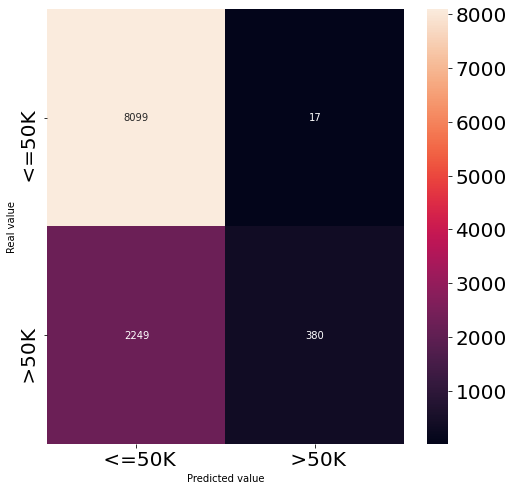

In [44]:
import matplotlib
import seaborn as sns
# нужно получить кол-во правильных и неправильых предсказаний по каждому классу от knn
# см. https://habr.com/ru/company/ods/blog/328372/

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test, y_knn)
print(nn_mtx)

# font = {'weight' : 'bold', 'size'   :22}
# matplotlib.rc('font', **font)

matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d", 
            xticklabels=encoders["salary"].classes_, 
            yticklabels=encoders["salary"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


[[8116    0]
 [2629    0]]


Text(0.5, 42.0, 'Predicted value')

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


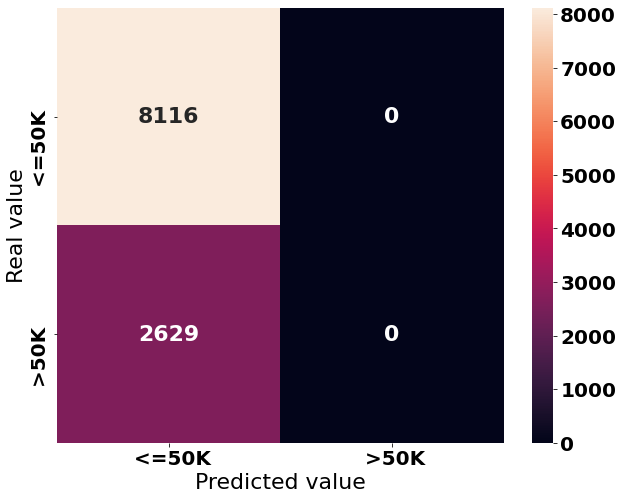

In [45]:
# по аналогии от dummy

mp_mtx = metrics.confusion_matrix(y_test, y_mp)
print(mp_mtx)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=encoders["salary"].classes_, 
            yticklabels=encoders["salary"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

## Precision

$$Precision = \frac{TP}{TP + FP}$$

precision демонстрирует способность отличать этот класс от других классов

In [46]:
print ('knn =', metrics.precision_score(y_test, y_knn), 'mp =', metrics.precision_score(y_test, y_mp))

knn = 0.9571788413098237 mp = 0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Recall

$$Recall = \frac{TP}{TP + FN}$$

Recall демонстрирует способность алгоритма обнаруживать данный класс вообще

In [47]:
print ('knn =', metrics.recall_score(y_test, y_knn), 'mp =', metrics.recall_score(y_test, y_mp))

knn = 0.14454165081780146 mp = 0.0


In [48]:
print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      8116
           1       0.96      0.14      0.25      2629

    accuracy                           0.79     10745
   macro avg       0.87      0.57      0.56     10745
weighted avg       0.83      0.79      0.72     10745



визуализация precision и recall

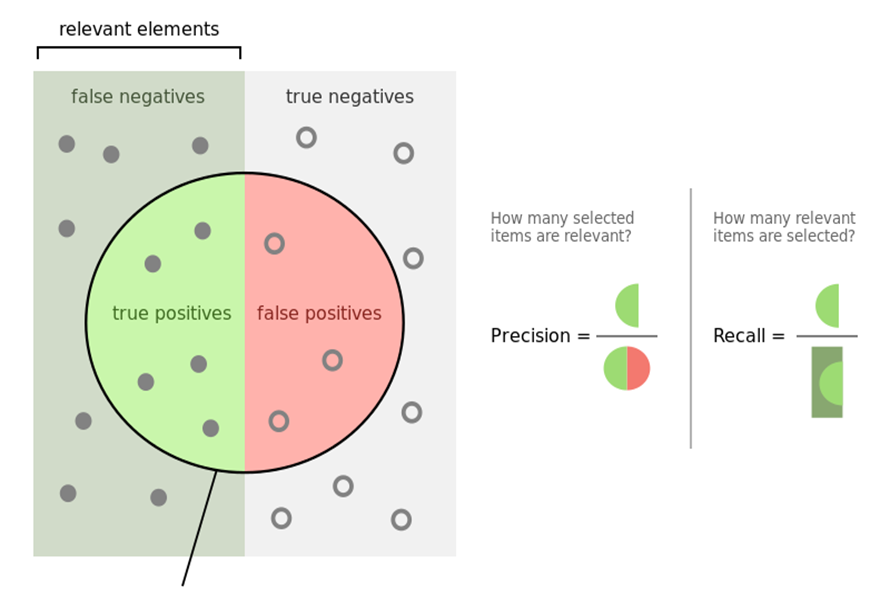

## F1

$$F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

* Как взвесить Precision и Recall?
    - Среднее арифметичиское плохо: (p=0.5, r=0.5) должно быть лучше чем (p=1, r=0), 
    - Лучше минимум, но при равной точности должен побеждать классфикатор с большей полнотой
    - Гармоничиское среднее, сглаженный минимум

In [49]:
print ('knn =', metrics.f1_score(y_test, y_knn), 'mp =', metrics.f1_score(y_test, y_mp))

knn = 0.25115664243225383 mp = 0.0


# <span style="color:orange"> Multiclass Precision-Recall </span>

#### Загрузим датасет с тремя классами

In [50]:
print(sns.get_dataset_names())
df_iris = sns.load_dataset("iris")
df_iris = df_iris.sample(n=150)
df_iris.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'tips', 'titanic']


,sepal_length,sepal_width,petal_length,petal_width,species
25,5.0,3.0,1.6,0.2,setosa
63,6.1,2.9,4.7,1.4,versicolor
143,6.8,3.2,5.9,2.3,virginica
41,4.5,2.3,1.3,0.3,setosa
80,5.5,2.4,3.8,1.1,versicolor


findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


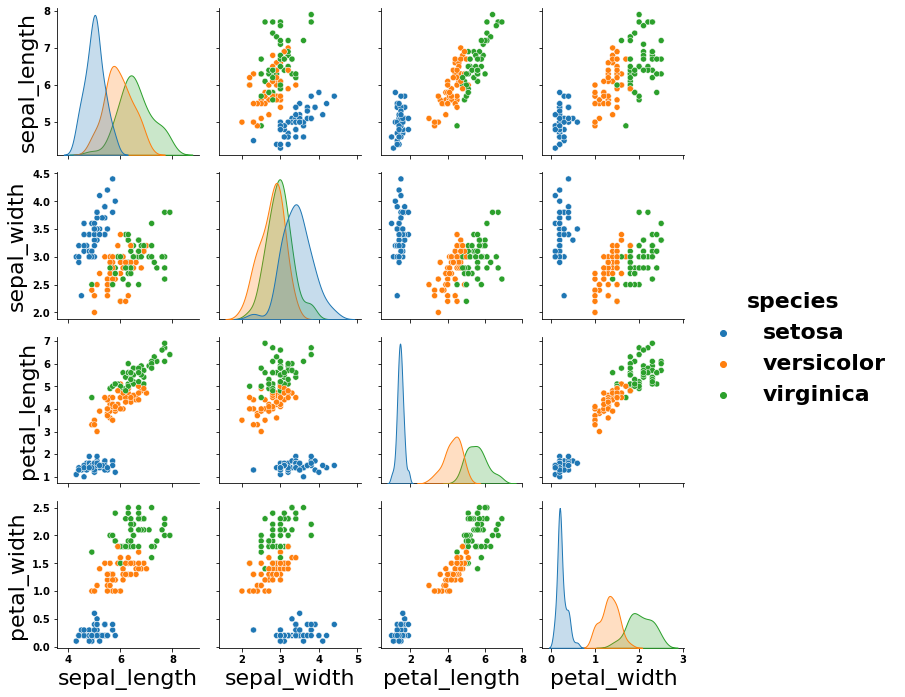

In [51]:
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)
sns.pairplot(df_iris, hue="species")

[Датасет ириса](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0)

In [52]:
# закодируем значения
df_iris, encoders = number_encode_features(df_iris)
# выбросим колонку, которую будем предсказывать
iris_X, iris_y = df_iris[df_iris.columns[:-1]].values, df_iris[df_iris.columns[-1]].values

# разделим на train test слайсингом
iris_X_train, iris_y_tain = iris_X[:30], iris_y[:30]
iris_X_test, iris_y_test = iris_X[40:], iris_y[40:]

In [53]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
25,5.0,3.0,1.6,0.2,0
63,6.1,2.9,4.7,1.4,1
143,6.8,3.2,5.9,2.3,2
41,4.5,2.3,1.3,0.3,0
80,5.5,2.4,3.8,1.1,1


In [54]:
# KNN и dummpy классификаторы на датасете
iris_clf_knn = KNeighborsClassifier().fit(iris_X_train, iris_y_tain)
iris_clf_mp = dummy.DummyClassifier("most_frequent").fit(iris_X_train, iris_y_tain)

In [55]:
# предсказываем
iris_y_knn = iris_clf_knn.predict(iris_X_test)
iris_y_mp = iris_clf_mp.predict(iris_X_test)

Пусть выборка состоит из K классов. Рассмотрим K двухклассовых задач, каждая из которых заключается в отделении своего класса от остальных, то есть целевые значения для k-й задаче вычисляются как $y_{ik} = [yi = k]$. Для каждой из них можно вычислить различные характеристики (TP, FP, и т.д.) алгоритма $a_k(x) = [a(x) = k]$.

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


Text(0.5, 46.0, 'Predicted value')

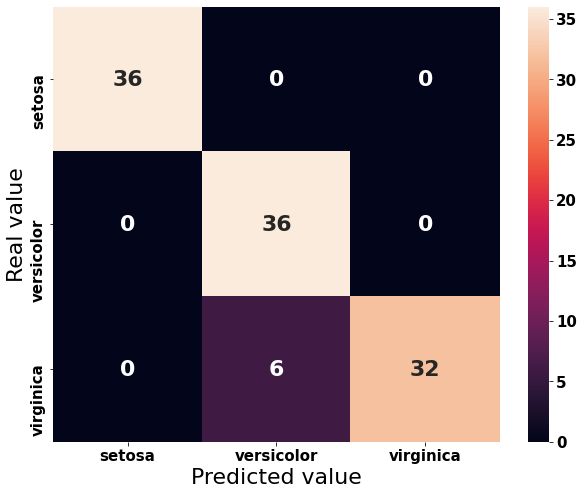

In [56]:
mp_mtx = metrics.confusion_matrix(iris_y_test, iris_y_knn)

fig = plt.figure(figsize=(10,8))
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
sns.heatmap(mp_mtx, annot=True, fmt="d", 
            xticklabels=encoders["species"].classes_, 
            yticklabels=encoders["species"].classes_)
plt.ylabel("Real value")
plt.xlabel("Predicted value")

**Macro-averaging** -- подсчет TP, FN, TN, FP для каждого класса, а после подсчет точности и полноты.

**Micro-averaging** -- подсчет  точности и полноты для каждого класса, а после подсчет их среденего.

In [57]:
print('для kNN:')
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

# 
print('\nдля dummy-classifier:')
iris_y_knn[iris_y_knn==1] = 0
print ('macro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='macro'), ', micro = ', metrics.f1_score(iris_y_test, iris_y_knn, average='micro'))

для kNN:
macro =  0.9457875457875456 , micro =  0.9454545454545454

для dummy-classifier:
macro =  0.5152882205513785 , micro =  0.6181818181818182


# AUC-ROC

[ВАЖНО](https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/) прочесть

In [58]:
# по аналогии возьмем knn и dummpy
clf_knn = KNeighborsClassifier(n_neighbors=29).fit(X_train, y_tain)
clf_mp = dummy.DummyClassifier("most_frequent").fit(X_train, y_tain)

In [59]:
# получаем ответы от классификаторов
y_knn = clf_knn.predict(X_test)
y_mp = clf_mp.predict(X_test)

ROC AUC = 0.5892


Text(0.5, 0, 'False Positive Rate')

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


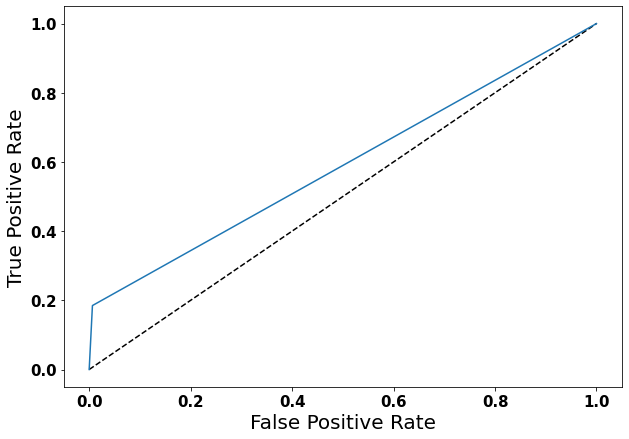

In [60]:
# строим рок кривую, чтоб посмотреть как справляемся с данными 
# (результат плохой у монетки roc auc = 0.5, см classification report f1, классы разбалансированны)
fpr, tpr, _ = metrics.roc_curve(y_test, y_knn)
plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

ROC AUC = 0.5000


Text(0.5, 0, 'False Positive Rate')

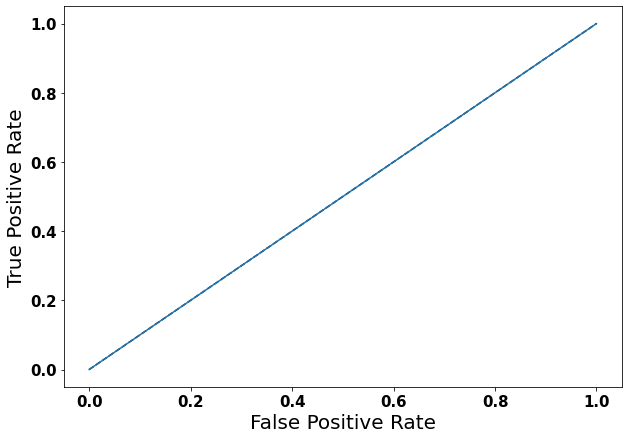

In [61]:
from matplotlib import pylab
fpr, tpr, _ = metrics.roc_curve(y_test, y_mp)
pylab.figure(figsize=(10, 7))
pylab.plot([0, 1], [0, 1], 'k--')
pylab.plot(fpr, tpr)
print ('ROC AUC = {0:.4f}'.format(metrics.auc(fpr, tpr)))
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)

# Метрики для задачи рeгрессии

Data: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [62]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', header=0, sep=';')

In [63]:
# будем предсказывать столбец quality (качество) вина по всем параметрам с помощью линейных методов и dummy
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b1acd02e8>,
      dtype=object)

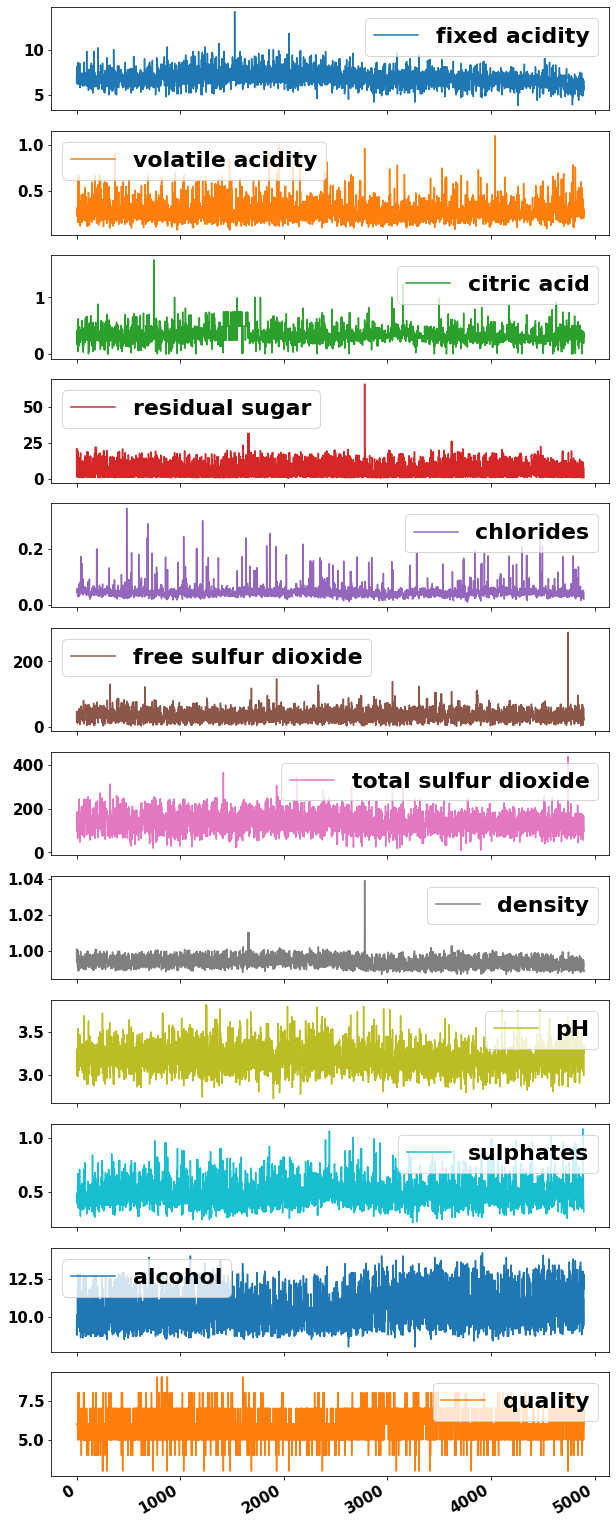

In [64]:
# df['alcohol'].plot(marker='*',style=' ', color='green')
# df['alcohol'] = df[df['alcohol'] < 15]
df.plot(subplots=True, figsize=(10, 30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b1aa2dba8>,
      dtype=object)

findfont: Font family ['Calibri'] not found. Falling back to DejaVu Sans.


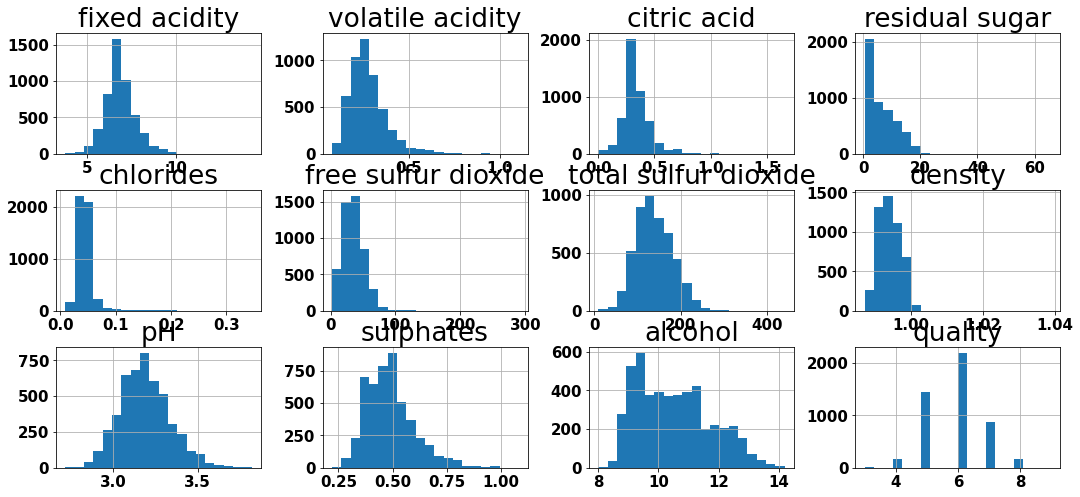

In [65]:
# строим гистограммы быстрее, чем в начале занятия
df.hist(figsize=(18, 8), layout=(3,4), bins=20)

In [66]:
# разделяем данные, убираем из обучающей ответы
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('quality', axis=1), df.quality, test_size=0.33, random_state=42)

In [67]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3167,5.6,0.28,0.40,6.1,0.034,36.0,118.0,0.99144,3.21,0.43,12.1
324,8.3,0.41,0.51,2.0,0.046,11.0,207.0,0.99300,3.02,0.55,11.4
4731,5.3,0.31,0.38,10.5,0.031,53.0,140.0,0.99321,3.34,0.46,11.7
2305,7.0,0.36,0.30,5.0,0.040,40.0,143.0,0.99173,3.33,0.42,12.2
1777,6.5,0.18,0.26,1.4,0.041,40.0,141.0,0.99410,3.34,0.72,9.5


In [68]:
# качество вынесли в отдельную y
y_train.head()

3167    7
324     5
4731    6
2305    7
1777    6
Name: quality, dtype: int64

In [69]:
# размеры обучающей и тестовой
print (X_train.shape, X_test.shape)
print (y_train.shape, y_test.shape)

(3281, 11) (1617, 11)
(3281,) (1617,)


In [70]:
from sklearn import linear_model

# линейный классификатор
regr = linear_model.LinearRegression()

# обучаем
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [71]:
# dummy классификатор
from sklearn import dummy

d_regr = dummy.DummyRegressor(strategy='mean')

# обучаем
d_regr.fit(X_train, y_train)

DummyRegressor(constant=None, quantile=None, strategy='mean')

In [72]:
# получаем предсказания от двух
predictions = regr.predict(X_test)

In [73]:
d_predictions = d_regr.predict(X_test)

In [74]:
# для всех вин имеем предсказания от линейного и dummy, отобразим первые 5
print (predictions.shape, '\t', predictions[0:5])

(1617,) 	 [6.37886848 6.3994996  6.40362171 5.82459689 6.45383134]


In [75]:
print (d_predictions.shape, '\t', d_predictions[0:5])

(1617,) 	 [5.86863761 5.86863761 5.86863761 5.86863761 5.86863761]


(array([ 1.,  0.,  0.,  0.,  3.,  1.,  3.,  5.,  6.,  3.,  9.,  5., 10.,
         9., 10., 24., 40., 49., 40., 51., 60., 88., 70., 82., 86., 66.,
        84., 67., 70., 65., 87., 71., 66., 67., 62., 49., 49., 40., 30.,
        18., 24., 10., 20.,  4.,  3.,  6.,  3.,  0.,  0.,  1.]),
 array([4.1477337 , 4.21105059, 4.27436748, 4.33768437, 4.40100125,
        4.46431814, 4.52763503, 4.59095192, 4.6542688 , 4.71758569,
        4.78090258, 4.84421947, 4.90753636, 4.97085324, 5.03417013,
        5.09748702, 5.16080391, 5.22412079, 5.28743768, 5.35075457,
        5.41407146, 5.47738834, 5.54070523, 5.60402212, 5.66733901,
        5.73065589, 5.79397278, 5.85728967, 5.92060656, 5.98392345,
        6.04724033, 6.11055722, 6.17387411, 6.237191  , 6.30050788,
        6.36382477, 6.42714166, 6.49045855, 6.55377543, 6.61709232,
        6.68040921, 6.7437261 , 6.80704299, 6.87035987, 6.93367676,
        6.99699365, 7.06031054, 7.12362742, 7.18694431, 7.2502612 ,
        7.31357809]),
 <a list of 50

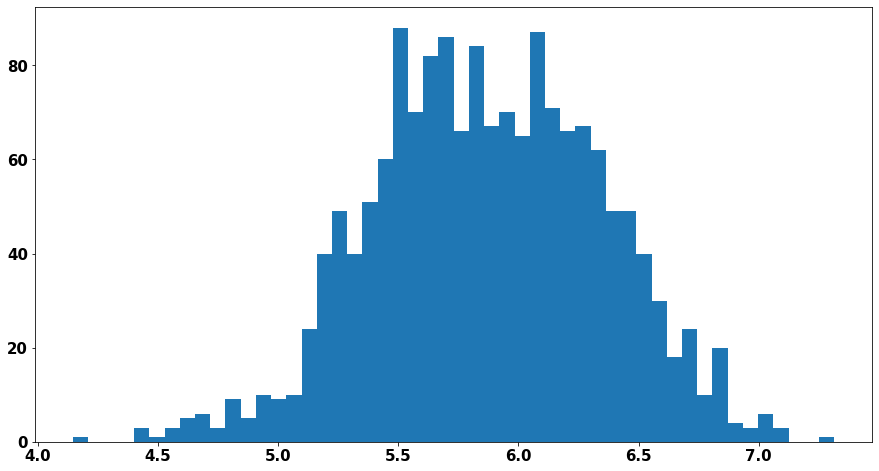

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plt.hist(predictions, bins=50)

In [77]:
type(X_test)

pandas.core.frame.DataFrame

In [78]:
X_odno = X_test.values[12]
X_odno

array([6.300e+00, 1.200e-01, 3.600e-01, 2.100e+00, 4.400e-02, 4.700e+01,
       1.460e+02, 9.914e-01, 3.270e+00, 7.400e-01, 1.140e+01])

In [79]:
import numpy as np

regr.predict(np.array([ X_odno ]))

array([6.65034987])

In [80]:
y_test.values[12]

7

0.7465388196766425

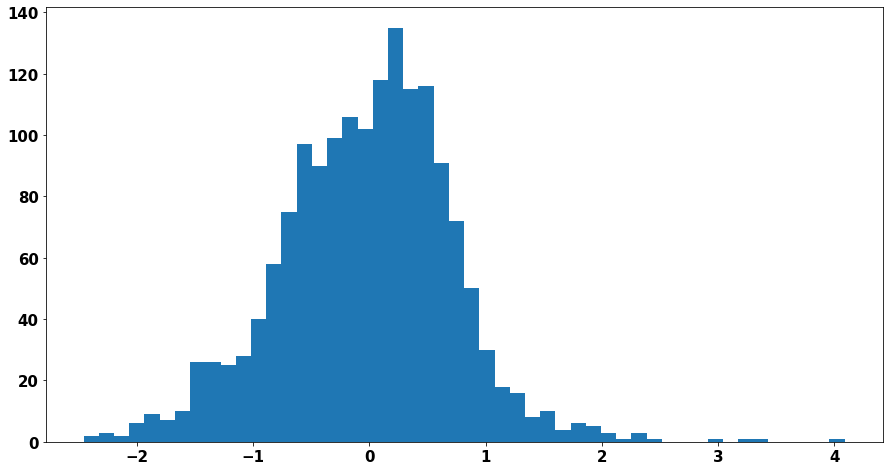

In [81]:
# отобразим разность предсказаний на гистограмме
rem = predictions - y_test
plt.figure(figsize=(15, 8))
plt.hist(rem, bins=50)
rem.std()

### Mean Square Error 

## $$ MSE(y, \hat y) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} ( y_i - \hat y_i )^2 $$

In [82]:
# см. ссылки выше
from sklearn import metrics
mse = metrics.mean_squared_error(y_test, predictions)
d_mse = metrics.mean_squared_error(y_test, d_predictions)

print ("MSE,  LR = {0:.4}, Dummy = {1:0.4}".format(mse, d_mse))

MSE,  LR = 0.5576, Dummy = 0.7638


In [83]:
rmse = np.sqrt(mse)
d_rmse = np.sqrt(d_mse)

print( "RMSE / LR = {0:.4}, Dummy = {1:0.4}".format(rmse, d_rmse))

RMSE / LR = 0.7467, Dummy = 0.8739


### Mean Absolute Error 

## $$ MAE(y, \hat y) = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} | y_i - \hat y_i | $$

In [84]:
mae = metrics.mean_absolute_error(y_test, predictions)
d_mae = metrics.mean_absolute_error(y_test, d_predictions)

print( "MAE / LR = {0:.4}, Dummy = {1:0.4}".format(mae, d_mae))

MAE / LR = 0.5806, Dummy = 0.6663


### Median Absolute Error 

In [85]:
medae = metrics.median_absolute_error(y_test, predictions)
d_medae = metrics.median_absolute_error(y_test, d_predictions)

print ("MedAE / LR = {0:.4}, Dummy = {1:0.4}".format(medae, d_medae))

MedAE / LR = 0.481, Dummy = 0.8686


### R² score, the coefficient of determination

## $$ R^2(y, \hat y) = 1 -  \frac{\sum_{i=1}^{n_{samples}} ( y_i - \hat y_i )^2}{\sum_{i=1}^{n_{samples}} {( y_i - \bar y_i )^2}} $$

## $ \bar y = \frac{1}{n_{samples}} \sum_{i=1}^{n_{samples}} y_i $

In [86]:
from sklearn import metrics

r2 = metrics.r2_score(y_test, predictions)
d_r2 = metrics.r2_score(y_test, d_predictions)

print (f"R2 score / LR = {round(r2, 4)}, Dummy = {round(d_r2, 6)}")

R2 score / LR = 0.2692, Dummy = -0.001034


# Вам надо найти в офф. документации логистическую регрессию и применить к нашым данным, сравнить оценки на test на метриках качества описанных выше с лин. регр.

In [87]:
np.linspace(0.62, 1.66, 20)

array([0.62      , 0.67473684, 0.72947368, 0.78421053, 0.83894737,
       0.89368421, 0.94842105, 1.00315789, 1.05789474, 1.11263158,
       1.16736842, 1.22210526, 1.27684211, 1.33157895, 1.38631579,
       1.44105263, 1.49578947, 1.55052632, 1.60526316, 1.66      ])

In [88]:
import warnings
warnings.filterwarnings("ignore")

# В sklearn есть специальный модуль для работы с кросс-валидацией
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# Зададим сетку - среди каких значений выбирать наилучший параметр.
param_grid = {"C":list(range(1, 10)),
              "penalty":["l1","l2"]}

# Создаем объект кросс-валидации
gs = GridSearchCV(LogisticRegression(),
                  param_grid,
                  cv=5,
                  scoring=['r2', 'neg_mean_absolute_error'],
                  refit=False)

# Обучаем его
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=False, return_train_score=False,
             scoring=['r2', 'neg_mean_absolute_error'], verbose=0)

In [89]:
gs.cv_results_['mean_test_r2']

array([        nan, -0.0409155 ,         nan, -0.03781427,         nan,
       -0.02517554,         nan, -0.02891078,         nan, -0.01996064,
               nan, -0.0334087 ,         nan, -0.02659055,         nan,
       -0.04352876,         nan, -0.03269157])

In [90]:
gs.cv_results_['params']

[{'C': 1, 'penalty': 'l1'},
 {'C': 1, 'penalty': 'l2'},
 {'C': 2, 'penalty': 'l1'},
 {'C': 2, 'penalty': 'l2'},
 {'C': 3, 'penalty': 'l1'},
 {'C': 3, 'penalty': 'l2'},
 {'C': 4, 'penalty': 'l1'},
 {'C': 4, 'penalty': 'l2'},
 {'C': 5, 'penalty': 'l1'},
 {'C': 5, 'penalty': 'l2'},
 {'C': 6, 'penalty': 'l1'},
 {'C': 6, 'penalty': 'l2'},
 {'C': 7, 'penalty': 'l1'},
 {'C': 7, 'penalty': 'l2'},
 {'C': 8, 'penalty': 'l1'},
 {'C': 8, 'penalty': 'l2'},
 {'C': 9, 'penalty': 'l1'},
 {'C': 9, 'penalty': 'l2'}]

In [91]:
list(zip(gs.cv_results_['mean_test_r2'],
         gs.cv_results_['mean_test_neg_mean_absolute_error'],
         gs.cv_results_['params']))

[(nan, nan, {'C': 1, 'penalty': 'l1'}),
 (-0.04091550214032198, -0.6245006867876899, {'C': 1, 'penalty': 'l2'}),
 (nan, nan, {'C': 2, 'penalty': 'l1'}),
 (-0.03781426689061122, -0.620233786241972, {'C': 2, 'penalty': 'l2'}),
 (nan, nan, {'C': 3, 'penalty': 'l1'}),
 (-0.025175540671090936, -0.6150522515499127, {'C': 3, 'penalty': 'l2'}),
 (nan, nan, {'C': 4, 'penalty': 'l1'}),
 (-0.028910781603679013, -0.6205377361992797, {'C': 4, 'penalty': 'l2'}),
 (nan, nan, {'C': 5, 'penalty': 'l1'}),
 (-0.0199606427791728, -0.6171840776626945, {'C': 5, 'penalty': 'l2'}),
 (nan, nan, {'C': 6, 'penalty': 'l1'}),
 (-0.0334086960823504, -0.6223670044919627, {'C': 6, 'penalty': 'l2'}),
 (nan, nan, {'C': 7, 'penalty': 'l1'}),
 (-0.02659054803738501, -0.6223683966291718, {'C': 7, 'penalty': 'l2'}),
 (nan, nan, {'C': 8, 'penalty': 'l1'}),
 (-0.04352876376896893, -0.6266348331291531, {'C': 8, 'penalty': 'l2'}),
 (nan, nan, {'C': 9, 'penalty': 'l1'}),
 (-0.03269156550417955, -0.62175492816572, {'C': 9, 'pena

In [92]:
alg = LogisticRegression(C=1291.5496650148827,
                         penalty='l2')
alg.fit(X_train, y_train)

LogisticRegression(C=1291.5496650148827, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
preds_logistic = alg.predict(X_test)

In [94]:
metrics.r2_score(y_test, preds_logistic)

-0.048832618705569875

In [95]:
metrics.median_absolute_error(y_test, preds_logistic)

1.0

Text(0, 0.5, 'Recall')

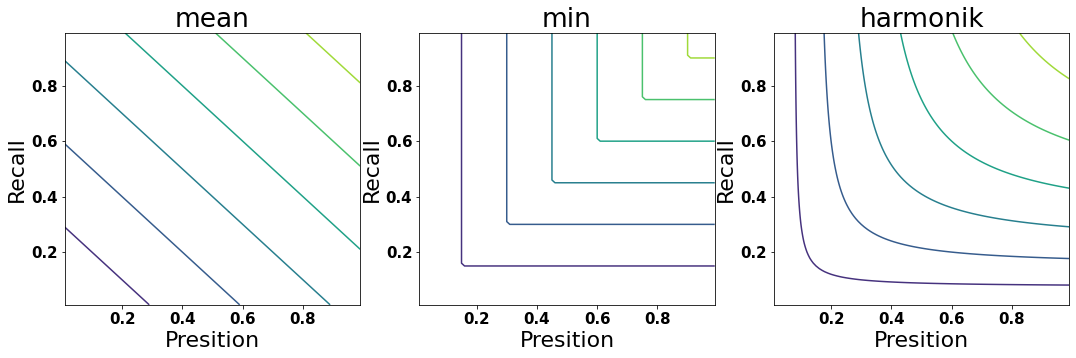

In [96]:
import scipy

fig, axs = plt.subplots(figsize=(18, 5), ncols=3)

x_, y_ = np.arange(0.01, 1, 0.01), np.arange(0.01, 1, 0.01)
X, Y = np.meshgrid(x_, y_)

Z = [[0.5*x + 0.5*y  for x in x_] for y in y_]
axs[0].contour(X, Y, Z)
axs[0].set_title('mean')
axs[0].set_xlabel('Presition')
axs[0].set_ylabel('Recall')

Z = [[min(x, y)  for x in x_] for y in y_]
axs[1].contour(X, Y, Z)
axs[1].set_title('min')
axs[1].set_xlabel('Presition')
axs[1].set_ylabel('Recall')


Z = [[scipy.stats.hmean([x, y])  for x in x_] for y in y_]
axs[2].contour(X, Y, Z)
axs[2].set_title('harmonik')
axs[2].set_xlabel('Presition')
axs[2].set_ylabel('Recall')

In [97]:
#from google.colab import drive
#drive.mount('/content/drive')